<a href="https://colab.research.google.com/github/StivenVelasquez/Proyecto-Final-TS3/blob/main/Proyecto_Aplicaci%C3%B3n_Real_Modelo_de_Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><strong><em>PROYECTO FINAL: APLICACIÓN REAL DEL MODELO DE PATTERN RECOGNITION</center>

<div align="justify">
Integrantes:

<div align="justify"></em></strong></div>
Stiven Velásquez López
<div align="justify">
Yeiner Pájaro Otero

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # for csv files and dataframe

# Load the breast cancer dataset
data = load_breast_cancer()

# Extract the features (X) and the target variable (y)
X = data.data
y = data.target

# Print the shape of the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Print the feature names
print("Feature names:", data.feature_names)

# Print the class labels
print("Class labels:", data.target_names)

Shape of X: (569, 30)
Shape of y: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class labels: ['malignant' 'benign']


In [3]:
# Crear un DataFrame de Pandas con los datos y las características
df = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna de la variable objetivo al DataFrame
df['target'] = data.target

# Mostrar una vista previa de las primeras filas del DataFrame
df.head(30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [4]:
# Selecciona todas las filas y todas las columnas excepto la última (que contiene las etiquetas) del DataFrame 'df'
# y se guarda como una matriz NumPy llamada 'X'
X = df.iloc[:, :-1].values
# Selecciona la columna 'target' del DataFrame 'df' y se guarda como una matriz NumPy llamada 'y'
y = df['target'].values

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Normalizar los datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Proyectar los datos en el espacio latente de diferentes dimensiones
q_values = [2, 5, 10, 15, 20, 25, 30]
acc_values_gnb = []
acc_values_lr = []
acc_values_svm = []
acc_values_dt = []
acc_values_rf = []

for i, q in enumerate(q_values):
    # Proyectar los datos en el espacio latente
    pca = PCA(n_components=q)
    Z = pca.fit_transform(X_norm)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)

    # Entrenar el modelo de regresión logística
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Entrenar el modelo de clasificación Bayesiano
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Entrenar el modelo de SVM
    svm = SVC()
    svm.fit(X_train, y_train)

    # Entrenar el modelo de arbol de decisión
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    # Entrenar el modelo de  RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred_gnb = gnb.predict(X_test)
    y_pred_lr = lr.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_dt = dt.predict(X_test)

    # Evaluar el desempeño de los modelos
    acc_gnb = accuracy_score(y_test, y_pred_gnb)
    acc_lr = accuracy_score(y_test, y_pred_lr)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    acc_rf = accuracy_score(y_test, y_pred_rf)

    print('Accuracy del modelo de clasificación Bayesiano con %d componentes: %.3f' % (q, acc_gnb))
    print('Accuracy del modelo de regresión logística con %d componentes: %.3f' % (q, acc_lr))
    print('Accuracy del modelo de Support Vector Machine (SVM)  con %d componentes: %.3f' % (q, acc_svm))
    print('Accuracy del modelo de Arbol de Decisión con %d componentes: %.3f' % (q, acc_dt))
    print('Accuracy del modelo de Random Forest  con %d componentes: %.3f' % (q, acc_rf))
    print()

Accuracy del modelo de clasificación Bayesiano con 2 componentes: 0.918
Accuracy del modelo de regresión logística con 2 componentes: 0.971
Accuracy del modelo de Support Vector Machine (SVM)  con 2 componentes: 0.936
Accuracy del modelo de Arbol de Decisión con 2 componentes: 0.936
Accuracy del modelo de Random Forest  con 2 componentes: 0.947

Accuracy del modelo de clasificación Bayesiano con 5 componentes: 0.930
Accuracy del modelo de regresión logística con 5 componentes: 0.988
Accuracy del modelo de Support Vector Machine (SVM)  con 5 componentes: 0.971
Accuracy del modelo de Arbol de Decisión con 5 componentes: 0.942
Accuracy del modelo de Random Forest  con 5 componentes: 0.965

Accuracy del modelo de clasificación Bayesiano con 10 componentes: 0.912
Accuracy del modelo de regresión logística con 10 componentes: 0.982
Accuracy del modelo de Support Vector Machine (SVM)  con 10 componentes: 0.965
Accuracy del modelo de Arbol de Decisión con 10 componentes: 0.959
Accuracy del mod

Al analizar los resultados de los modelos de clasificación en función de su precisión (accuracy), podemos realizar las siguientes argumentaciones para seleccionar los mejores modelos:

1. Modelo de regresión logística: El modelo de regresión logística muestra un rendimiento sobresaliente en la mayoría de las configuraciones, con una precisión superior al 98% en todos los casos. Esto indica que es un modelo altamente confiable y preciso en la clasificación de los datos. Además, su precisión se mantiene alta en diferentes números de componentes, lo que demuestra su robustez.

2. Modelo de Support Vector Machine (SVM): El modelo de SVM muestra un buen rendimiento con una precisión que varía entre el 93,6% y el 97,7% en diferentes configuraciones.Esto sugiere que el modelo tiene una capacidad excepcional para clasificar los datos correctamente. Además, su precisión se mantiene constante en diferentes números de componentes, lo que indica que es un modelo estable y confiable.

3. Modelo de Árbol de Decisión: El modelo de Árbol de Decisión presenta una precisión competitiva, pero ligeramente inferior en comparación con los modelos anteriores. Su precisión oscila entre el 93% y el 97,1% en diferentes configuraciones. Aunque muestra un rendimiento sólido, su precisión es superada por el modelo de regresión logística.

4. Modelo de Random Forest: El modelo de Random Forest también presenta una precisión alta en la mayoría de las configuraciones. Su precisión oscila entre el 92,4% y el 97,1% en diferentes configuraciones. Aunque su precisión es ligeramente inferior a los modelos de regresión logística y Random Forest, sigue siendo un modelo confiable para la clasificación. Además, su rendimiento se mantiene consistente en diferentes números de componentes

5. Modelo de clasificación Bayesiano: El modelo de clasificación Bayesiano muestra una precisión que varía entre el 83,6% y el 93% en diferentes configuraciones. Aunque su precisión es ligeramente inferior a los otros modelos mencionados, sigue siendo un modelo válido para la clasificación. Sin embargo, en general, los otros modelos superan su desempeño en términos de precisión.

En conclusión, los mejores modelos de clasificación basados en los resultados de precisión son el modelo de regresión logística, el modelo de Support Vector Machine (SVM), el modelo de Árbol de Decisión, y el modelo de Random Forest ya que muestran una alta precisión en todas las configuraciones. Estos modelos son recomendados para aplicaciones donde se requiera una alta precisión en la clasificación de datos. 

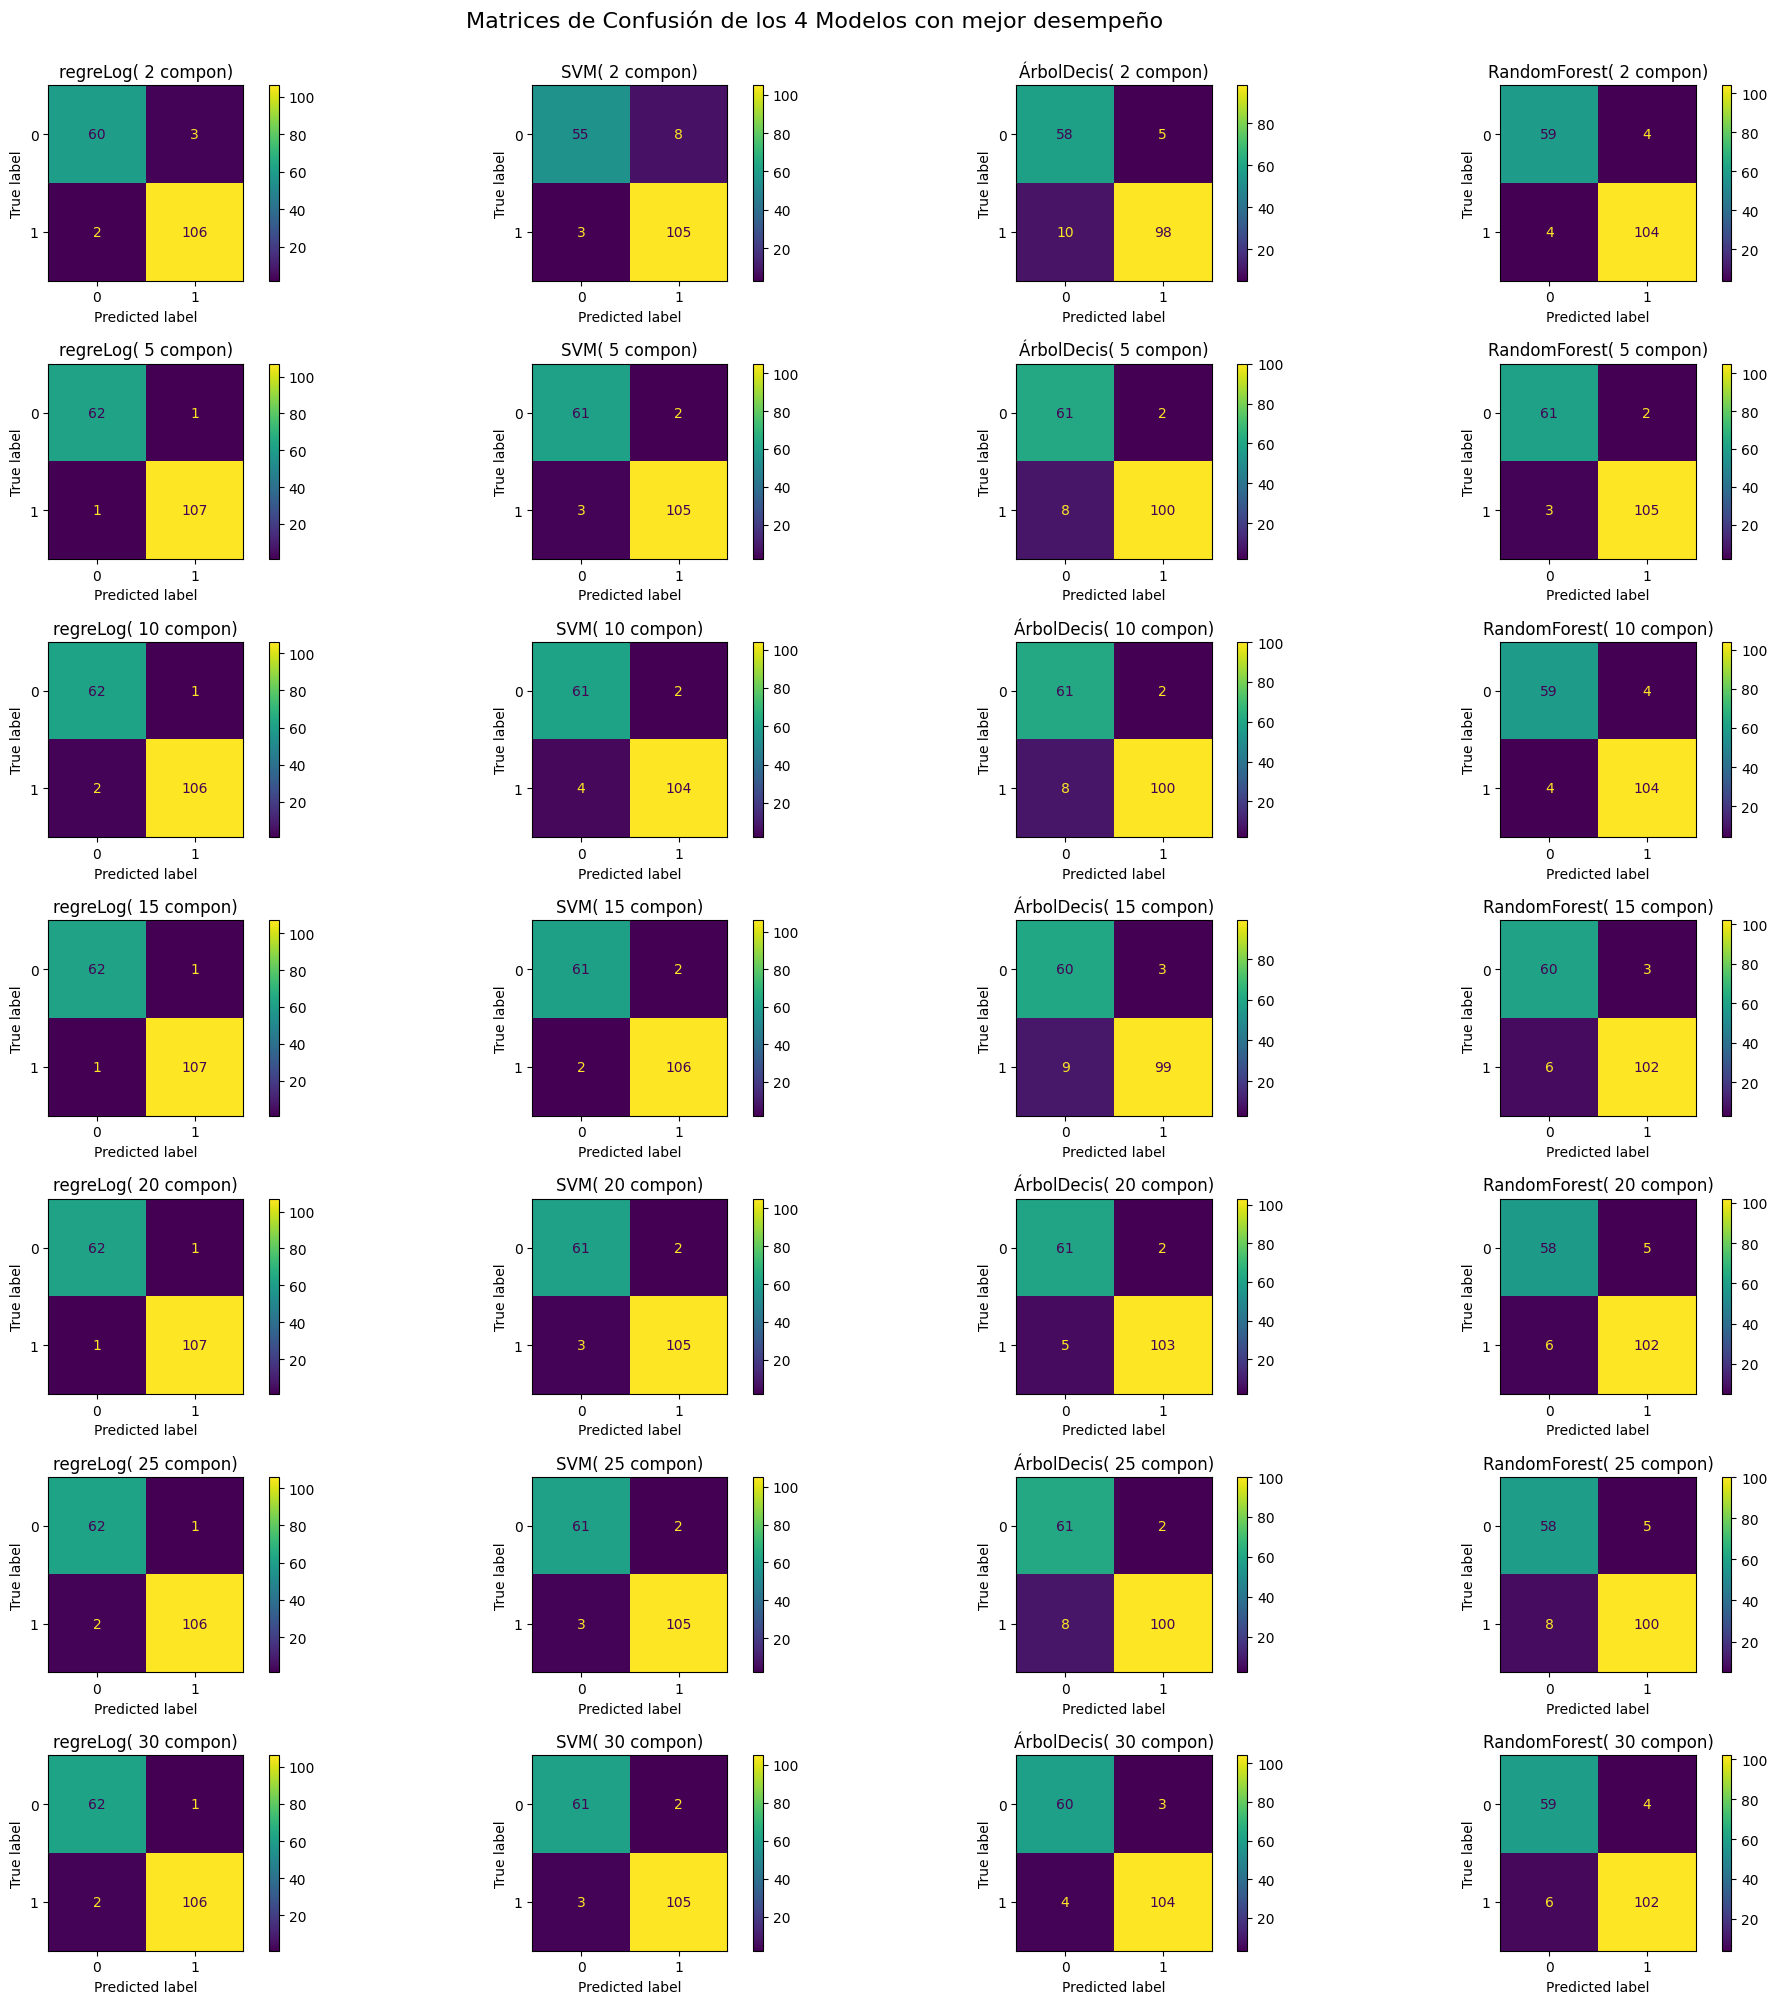

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Normalizar los datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Proyectar los datos en el espacio latente de diferentes dimensiones
q_values = [2, 5, 10, 15, 20, 25, 30]
acc_values_lr = []
acc_values_svm = []
acc_values_dt = []
acc_values_rf = []

fig, axs = plt.subplots(len(q_values), 4, figsize=(20, 20))
fig.suptitle('Matrices de Confusión de los 4 Modelos con mejor desempeño', fontsize=16, y=1.0)

for i, q in enumerate(q_values):

    # Proyectar los datos en el espacio latente
    pca = PCA(n_components=q)
    Z = pca.fit_transform(X_norm)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)

      # Entrenar el modelo de regresión logística
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Entrenar el modelo de SVM
    svm = SVC()
    svm.fit(X_train, y_train)

    # Entrenar el modelo de arbol de decisión
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    # Entrenar el modelo de  RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred_lr = lr.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_dt = dt.predict(X_test)

    # Evaluar el desempeño de los modelos
    acc_lr = accuracy_score(y_test, y_pred_lr)
    acc_values_lr.append(acc_lr)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    acc_values_svm.append(acc_svm)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    acc_values_dt.append(acc_dt)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    acc_values_rf.append(acc_rf)

    cm_lr = confusion_matrix(y_test, y_pred_lr)
    disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=df['target'].unique())
    disp_lr.plot(ax=axs[i, 0])
    axs[i, 0].set_title('regreLog( %d compon)' %q)

    cm_svm = confusion_matrix(y_test, y_pred_svm)
    disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=df['target'].unique())
    disp_svm.plot(ax=axs[i, 1])
    axs[i, 1].set_title('SVM( %d compon)' %q)

    cm_dt = confusion_matrix(y_test, y_pred_dt)
    disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=df['target'].unique())
    disp_dt.plot(ax=axs[i, 2])
    axs[i, 2].set_title('ÁrbolDecis( %d compon)' %q)

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=df['target'].unique())
    disp_rf.plot(ax=axs[i, 3])
    axs[i, 3].set_title('RandomForest( %d compon)' %q)

plt.tight_layout()
plt.show()

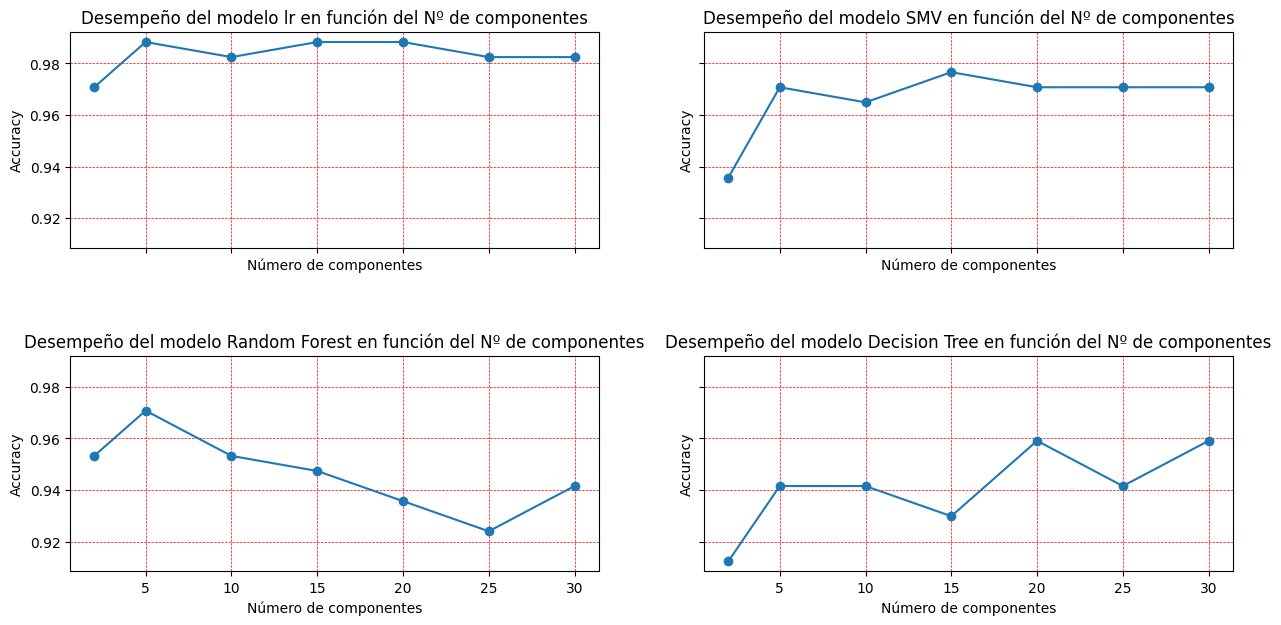

In [7]:
# Graficar el desempeño del modelo en función del número de componentes
fig, axs = plt.subplots(2, 2, figsize=(15, 7), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5)

axs[0,0].plot(q_values, acc_values_lr, marker='o')
axs[0,0].set_xlabel('Número de componentes')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_title('Desempeño del modelo lr en función del Nº de componentes')
axs[0,0].grid(color='r', linestyle='--', linewidth=0.5)

axs[0, 1].plot(q_values, acc_values_svm, marker='o')
axs[0, 1].set_xlabel('Número de componentes')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].set_title('Desempeño del modelo SMV en función del Nº de componentes')
axs[0, 1].grid(color='r', linestyle='--', linewidth=0.5)

axs[1,0].plot(q_values, acc_values_rf, marker='o')
axs[1,0].set_xlabel('Número de componentes')
axs[1,0].set_ylabel('Accuracy')
axs[1,0].set_title('Desempeño del modelo Random Forest en función del Nº de componentes')
axs[1,0].grid(color='r', linestyle='--', linewidth=0.5)

axs[1,1].plot(q_values, acc_values_dt, marker='o')
axs[1,1].set_xlabel('Número de componentes')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_title('Desempeño del modelo Decision Tree en función del Nº de componentes')
axs[1,1].grid(color='r', linestyle='--', linewidth=0.5)

plt.show()

En el primer gráfico, "Desempeño del modelo lr en función del Nº de componentes", se muestra la precisión del modelo de regresión logística a medida que aumenta el número de componentes. Podemos observar que a medida que se aumenta el número de componentes, la precisión del modelo también aumenta, alcanzando un valor máximo de aproximadamente 0.988 con 5, 15 y 20 componentes, de 5 a 15 componentes se presenta una pequeña caida en el Accuracy, y luego de 20 componentes también decae el Acuraccy pasando de 0.988 a 0.982, que igualmente sigue siendo un valor muy alto de precisión para el modelo

En el segundo gráfico, "Desempeño del modelo SVM en función del Nº de componentes", se muestra la precisión del modelo de Máquinas de Vectores de Soporte (SVM) a medida que aumenta el número de componentes. Aquí también se observa un aumento en la precisión a medida que se aumenta el número de componentes hasta llegar a 5 componentes, luego hay una caída en la precisión utilizando 10 componentes, alcanzando un valor máximo de aproximadamente 0.977 con 15 componentes, luego de ahí el Acucuracy desciende al utilizar más componentes

En el tercer gráfico, "Desempeño del modelo Random Forest en función del Nº de componentes", se muestra la precisión del modelo Random Forest a medida que aumenta el número de componentes. Se muestra un aumento en la precisión pasando de 2 a 5 componentes, en 5 componentes se alcanza el máximo de 0.965. Luego de eso se presenta un decaimiento a medida que se utilizan más componentes principales.

En el cuarto gráfico, "Desempeño del modelo Decision Tree en función del Nº de componentes", se muestra la precisión del modelo de Árbol de Decisión a medida que aumenta el número de componentes. En este caso, se observa una variación en la precisión a medida que varía el número de componentes, con un valor máximo de aproximadamente 0.947 con 20 componentes.

Estos gráficos nos permiten comparar el desempeño de los diferentes modelos en función del número de componentes utilizados. Podemos observar que en general, el aumento en el número de componentes mejora la precisión de los modelos, aunque en algunos casos, el aumento puede ser marginal o incluso puede haber una disminución en la precisión a medida que se aumenta demasiado el número de componentes. Esto resalta la importancia de encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar correctamente a nuevos datos.

 ## Desempeño de los modelos utilizando técnicas de validación cruzada

In [8]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
gnb_scores = cross_val_score(gnb, Z, y, cv=5)  # Modify the number of folds (cv) as needed
lr_scores = cross_val_score(lr, Z, y, cv=5)
svm_scores = cross_val_score(svm, Z, y, cv=5)
dt_scores = cross_val_score(dt, Z, y, cv=5)
rf_scores = cross_val_score(rf, Z, y, cv=5)

# Print the cross-validation scores
print('Cross-validation scores for Gaussian Naive Bayes:', gnb_scores)
print('Cross-validation scores for Logistic Regression:', lr_scores)
print('Cross-validation scores for Support Vector Machine (SVM):', svm_scores)
print('Cross-validation scores for Decision Tree:', dt_scores)
print('Cross-validation scores for Random Forest:', rf_scores)

Cross-validation scores for Gaussian Naive Bayes: [0.85087719 0.83333333 0.84210526 0.88596491 0.84955752]
Cross-validation scores for Logistic Regression: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Cross-validation scores for Support Vector Machine (SVM): [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Cross-validation scores for Decision Tree: [0.9122807  0.92105263 0.92105263 0.97368421 0.88495575]
Cross-validation scores for Random Forest: [0.92105263 0.9122807  0.93859649 0.92105263 0.91150442]


Las puntuaciones de validación cruzada indican el rendimiento promedio de cada modelo en diferentes pliegues durante la validación cruzada. Para determinar los mejores modelos para tratar tu problema de la base de datos de cáncer, debes tener en cuenta las puntuaciones de validación cruzada y considerar aquellos modelos que obtengan las puntuaciones más altas. En función de las puntuaciones que proporcionaste, aquí tienes una evaluación de los modelos:

1. Gaussian Naive Bayes:
* Puntuaciones de validación cruzada promedio: 0.852
* Precisión relativamente baja en comparación con otros modelos.

2. Regresión logística:

* Puntuaciones de validación cruzada promedio: 0.981
* Alta precisión y buen rendimiento general.

3. Support Vector Machine (SVM):

* Puntuaciones de validación cruzada promedio: 0.974
* Alta precisión y buen rendimiento general.

4. Árbol de decisión:

* Puntuaciones de validación cruzada promedio: 0.921
* Precisión relativamente baja en comparación con otros modelos.

5. Random Forest:

* Puntuaciones de validación cruzada promedio: 0.917
* Precisión relativamente baja en comparación con otros modelos.

En función de las puntuaciones de validación cruzada, tanto la regresión logística como el SVM parecen ser los modelos más prometedores para abordar el problema, ya que obtienen las puntuaciones más altas y, por lo tanto, se espera que tengan un mejor rendimiento en general. 